# Monty game simulation

- Simulate three doors, one car, and two goats.
 - Simulate three players: the switcher, the conservative, and the newcomer. 
 - Record who wins.
 - Repeat it many times.
 - Which player do you want to be?
 
 - What would happen if you had 100 doors to choose from and the presenter opens 98 or them?
 
- And what if you had $N$ doors to choose from and the presenter opens $M\leq N-2$ of them? Study how the probability of winning changes as a function of $M$ and $N$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Three doors

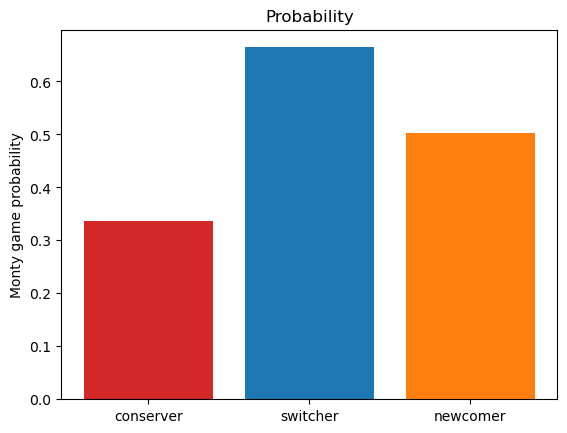

In [2]:
num_games = 10000
win_count_cons = 0
win_count_swit = 0
win_count_new = 0
doors = np.arange(3)

for i in range(num_games):
    
    car = np.random.choice(doors) #One of the door has a car behind
    first_choice = np.random.choice(doors) #First choice of the player
    
    if car == first_choice: #To remove the problem in which the two doors are the same 
        monty_door = np.random.choice(np.delete(doors, car))  #Monty proposes a new door (obv without the car)
    else: 
        monty_door = np.random.choice(np.delete(doors, [first_choice, car])) #Monty proposes a new door (obv without the car)
        
    switcher_choice = np.random.choice(np.delete(doors, [first_choice, monty_door])) #Switcher changes door
    newcomer_choice = np.random.choice(np.delete(doors, monty_door)) #Newcomer chooses a door
    
    #We increase the counts 
    if first_choice == car:
        win_count_cons += 1
        
    if switcher_choice == car:
        win_count_swit += 1   
        
    if newcomer_choice == car:
        win_count_new += 1 

#Compute the probability    
prob_cons = win_count_cons/num_games
prob_swit = win_count_swit/num_games
prob_new = win_count_new/num_games

#Bar plot
fig, ax = plt.subplots()

people = ['conserver', 'switcher', 'newcomer']
counts = [prob_cons, prob_swit, prob_new]
bar_colors = ['tab:red', 'tab:blue','tab:orange']

ax.bar(people, counts, color= bar_colors)

ax.set_ylabel('Monty game probability')
ax.set_title('Probability')

plt.show()

## 100 doors

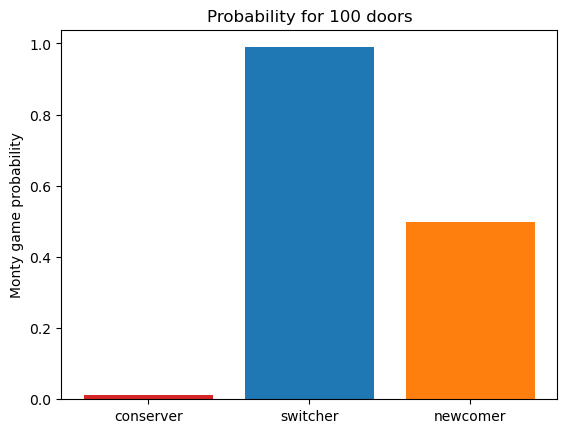

In [3]:
import numpy as np
import matplotlib.pyplot as plt

num_games = 10000
win_count_cons = 0
win_count_swit = 0
win_count_new = 0
doors = np.arange(100)

for i in range(num_games):
    
    car = np.random.choice(doors) #One of the door has a car behind
    first_choice = np.random.choice(doors) #First choice of the player

    if car == first_choice: #To remove the problem in which the two doors are the same 
       monty_doors = np.random.choice(np.delete(doors, car), 8, replace=False) 
       notpossiblechoices= np.append(monty_doors, car)
    #If we want only the result we can simple put notpossiblechoices=monty_doors in this case
    else: 
        monty_doors = np.delete(doors, [first_choice, car]) #Monty opens the other 98 doors
        notpossiblechoices= np.append(monty_doors, first_choice)
     #These are the doors that the switcher cannot open
    
    switcher_choice = np.random.choice(np.delete(doors, notpossiblechoices)) #Switcher changes door
    newcomer_choice = np.random.choice(np.delete(doors, monty_doors)) #Newcomer chooses a door

    if first_choice == car:
        win_count_cons += 1
        
    if switcher_choice == car:
        win_count_swit += 1   
        
    if newcomer_choice == car:
        win_count_new += 1 
    
prob_cons = win_count_cons/num_games
prob_swit = win_count_swit/num_games
prob_new = win_count_new/num_games

#Bar plot
fig, ax = plt.subplots()

people = ['conserver', 'switcher', 'newcomer']
counts = [prob_cons, prob_swit, prob_new]
bar_colors = ['tab:red', 'tab:blue','tab:orange']

ax.bar(people, counts, color= bar_colors)

ax.set_ylabel('Monty game probability')
ax.set_title('Probability for 100 doors')

plt.show()

# $N$ doors to choose from and the presenter opens $M\leq N-2$ of them

### Fixed N, change M

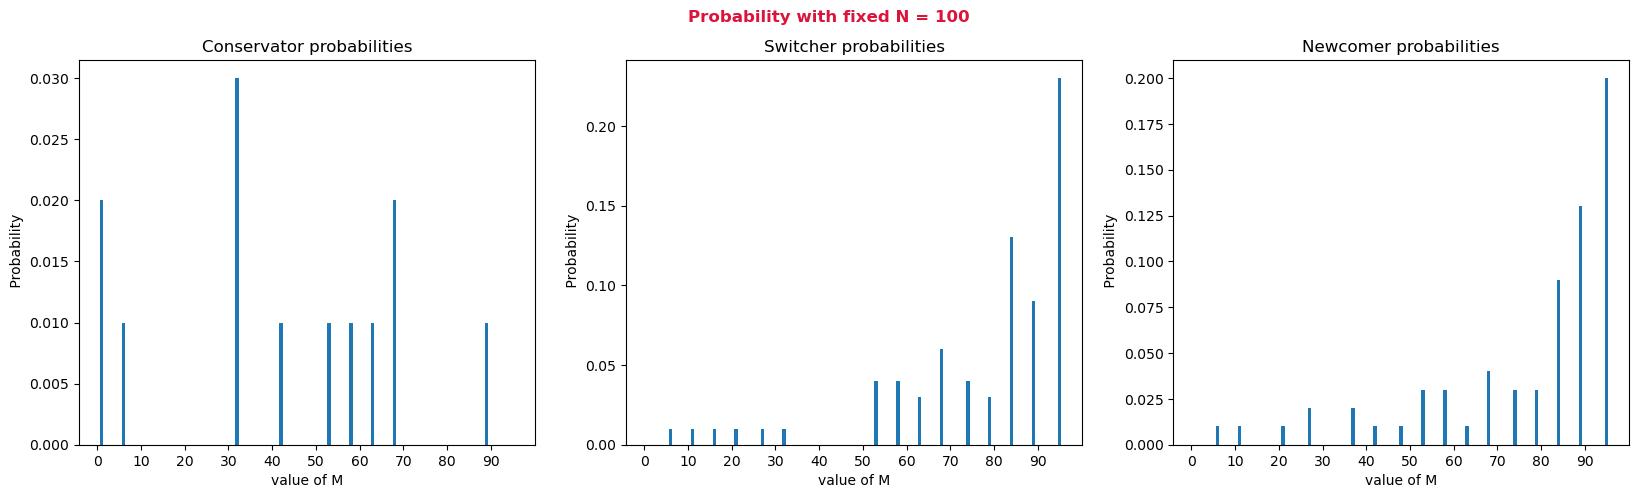

In [7]:
num_games = 100 #Number of games 

#Initialization 
conservator_N= np.zeros(19)
switcher_N= np.zeros(19)
newcomer_N= np.zeros(19)

#I fixed N, I generate 19 value of M
N = 100
Ms = np.linspace(1, 95, 19).astype(int)

for j in range(19):
    #Resetting the counters every cicle
    win_count_cons = 0
    win_count_swit = 0
    win_count_new = 0
    
    doors = np.arange(N) #I assign a number to each doors
    
    for i in range(num_games):
        
        car = np.random.choice(doors) #One of the door has a car behind
        first_choice = np.random.choice(doors) #First choice of the player

        if car == first_choice: #To remove the problem in which the two doors are the same 
           monty_doors = np.random.choice(np.delete(doors, car), Ms[j], replace=False)  #Monty opens the other M doors
           notpossiblechoices= np.append(monty_doors, car) 
           #These are the doors that cannot be opened by the player, because they are already opened by Monty or it is the first choice
           #If we want only the result we can simple put notpossiblechoices=monty_doors in this case
        else: 
            monty_doors = np.random.choice(np.delete(doors, [first_choice, car]), Ms[j], replace=False)  #Monty opens the other M doors
            notpossiblechoices= np.append(monty_doors, first_choice)
            #These are the doors that cannot be opened by the player, because they are already opened by Monty or it is the first choice
            #These are the doors that the switcher cannot open
        
        switcher_choice = np.random.choice(np.delete(doors, notpossiblechoices)) #Switcher changes door
        newcomer_choice = np.random.choice(np.delete(doors, monty_doors)) #Newcomer chooses a door

        if first_choice == car:
            win_count_cons += 1
            
        if switcher_choice == car:
            win_count_swit += 1   
            
        if newcomer_choice == car:
            win_count_new += 1 
            
    #Compute the probabilities        
    prob_cons = win_count_cons/num_games
    prob_swit = win_count_swit/num_games
    prob_new = win_count_new/num_games
    
    #I store the probabilities of each game
    conservator_N[j]= prob_cons
    switcher_N[j]= prob_swit
    newcomer_N[j]= prob_new
    
#Plots of the probabilities as a function of M
fig, ax2 = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
fig.suptitle('Probability with fixed N = 100', fontsize= 'large', fontweight = "bold", color= 'crimson')

ax2[0].set_title('Conservator probabilities')
ax2[0].set(xlabel='value of M', ylabel=' Probability')
ax2[0].bar(Ms, conservator_N)
ax2[0].set_xticks(np.arange(0, 100, 10))

ax2[1].set_title('Switcher probabilities')
ax2[1].set(xlabel='value of M', ylabel=' Probability')
ax2[1].bar(Ms, switcher_N)
ax2[1].set_xticks(np.arange(0, 100, 10))

ax2[2].set_title('Newcomer probabilities')
ax2[2].set(xlabel='value of M', ylabel=' Probability')
ax2[2].bar(Ms, newcomer_N)
ax2[2].set_xticks(np.arange(0, 100, 10))

plt.show()

### Fixed M, change N

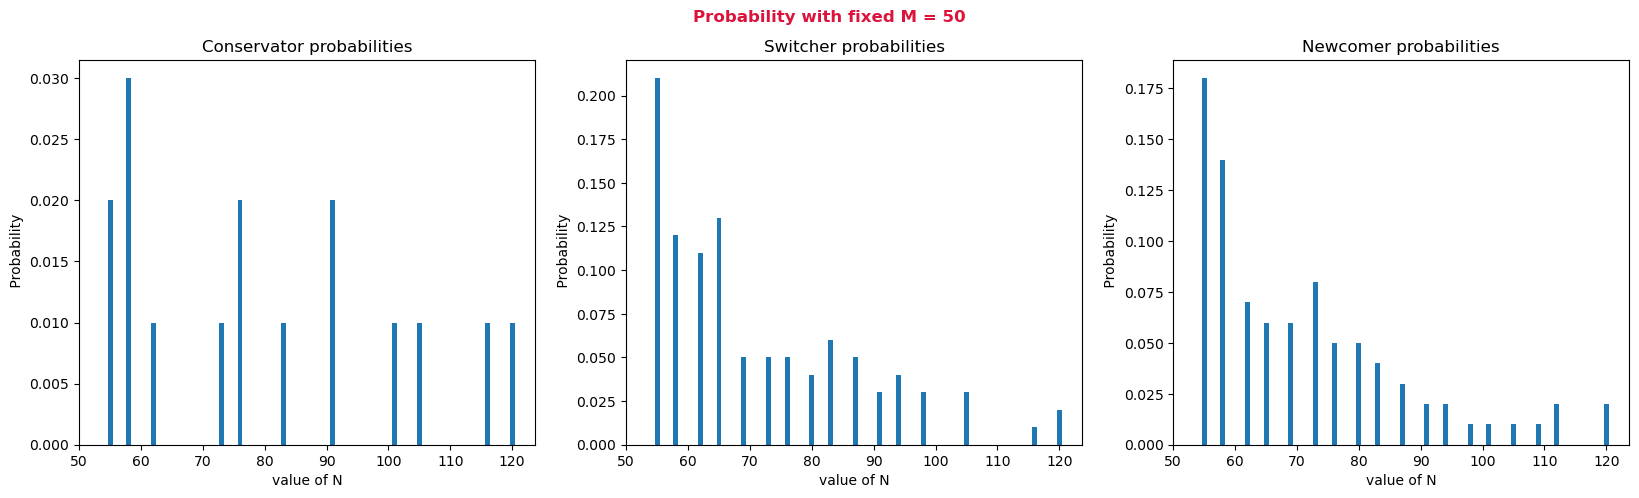

In [6]:
#Initialization 
conservator_M= np.zeros(19)
switcher_M= np.zeros(19)
newcomer_M= np.zeros(19)

#I fixed M, I generate 19 value of N (bigger than M)
M = 50
Ns = np.linspace(55, 120, 19).astype(int)

for j in range(19):
    #Resetting the counters every cicle
    win_count_cons = 0
    win_count_swit = 0
    win_count_new = 0
    
    doors = np.arange(Ns[j]) #I assign a number to each doors
    
    for i in range(num_games):
        
        car = np.random.choice(doors) #One of the door has a car behind
        first_choice = np.random.choice(doors) #First choice of the player

        if car == first_choice: #To remove the problem in which the two doors are the same 
           monty_doors = np.random.choice(np.delete(doors, car), M, replace=False)  #Monty opens the other M doors
           notpossiblechoices= np.append(monty_doors, car) 
           #These are the doors that cannot be opened by the player, because they are already opened by Monty or it is the first choice
        #If we want only the result we can simple put notpossiblechoices=monty_doors in this case
        else: 
            monty_doors = np.random.choice(np.delete(doors, [first_choice, car]), M, replace=False)  #Monty opens the other M doors
            notpossiblechoices= np.append(monty_doors, first_choice)
            #These are the doors that cannot be opened by the player, because they are already opened by Monty or it is the first choice
         #These are the doors that the switcher cannot open
        
        switcher_choice = np.random.choice(np.delete(doors, notpossiblechoices)) #Switcher changes door
        newcomer_choice = np.random.choice(np.delete(doors, monty_doors)) #Newcomer chooses a door

        if first_choice == car:
            win_count_cons += 1
            
        if switcher_choice == car:
            win_count_swit += 1   
            
        if newcomer_choice == car:
            win_count_new += 1 
            
    #Compute the probabilities        
    prob_cons = win_count_cons/num_games
    prob_swit = win_count_swit/num_games
    prob_new = win_count_new/num_games
    
    #I store the probabilities of each game
    conservator_M[j]= prob_cons
    switcher_M[j]= prob_swit
    newcomer_M[j]= prob_new
    
#Plots of the probabilities as a function of M
fig, ax3 = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
fig.suptitle('Probability with fixed M = 50', fontsize= 'large', fontweight = "bold", color= 'crimson')

ax3[0].set_title('Conservator probabilities')
ax3[0].set(xlabel='value of N', ylabel=' Probability')
ax3[0].bar(Ns, conservator_M)
ax3[0].set_xticks(np.arange(50, 130, 10))

ax3[1].set_title('Switcher probabilities')
ax3[1].set(xlabel='value of N', ylabel=' Probability')
ax3[1].bar(Ns, switcher_M)
ax3[1].set_xticks(np.arange(50, 130, 10))

ax3[2].set_title('Newcomer probabilities')
ax3[2].set(xlabel='value of N', ylabel=' Probability')
ax3[2].bar(Ns, newcomer_M)
ax3[2].set_xticks(np.arange(50, 130, 10))

plt.show()